# pyMixtComp: prostate example

Unsupervised clustering and prediction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pyMixtComp import MixtComp
from pyMixtComp.data import load_prostate

In [2]:
plt.rcParams["figure.figsize"] = (10, 6)

## Data preparation

Import the prostate dataset included in the package

In [3]:
prostate, model = load_prostate()
prostate

,Age,Wt,PF,HX,SBP,DBP,EKG,HG,SZ,SG,AP,BM
0,75,76,1,1,15,9,5,138,1.4142,8,1.0986,1
1,76,?,?,?,?,?,?,?,5.3852,9,2.4849,?
2,54,116,1,1,13,7,4,146,6.4807,?,1.9459,1
3,69,102,1,2,14,8,5,134,1.7321,9,1.0986,1
4,66,?,?,?,?,?,?,?,1,9,2.3979,?
...,...,...,...,...,...,...,...,...,...,...,...,...
501,78,108,1,1,11,6,1,158,3,13,1.7918,1
502,78,127,1,2,16,10,5,158,2.2361,9,1.6094,1
503,77,93,1,1,17,10,4,160,3.3166,9,2.0794,1
504,82,96,1,2,12,6,5,124,5.6569,13,4.4308,1


The dataset is already in the right format with column types as object and missing values as ?.

In [4]:
prostate.dtypes

Age    object
Wt     object
PF     object
HX     object
SBP    object
DBP    object
EKG    object
HG     object
SZ     object
SG     object
AP     object
BM     object
dtype: object

## Learning

In [5]:
mod = {}
bic = {}
icl = {}
for k in range(1, 9):
    mod[k] = MixtComp(n_components=k, n_init=5, n_init_per_class=50)
    try:
        mod[k].fit(prostate, model)
        bic[k] = mod[k].bic()
        icl[k] = mod[k].icl()
    except RuntimeError:
        bic[k] = np.nan
        icl[k] = np.nan

All MixtComp results are saved in the res_ attribute (`mod[k].res_`)

### Criterion

Draw the criterion value (BIC and ICL) for each model that was built. The higher the value (close to 0) the better the model.

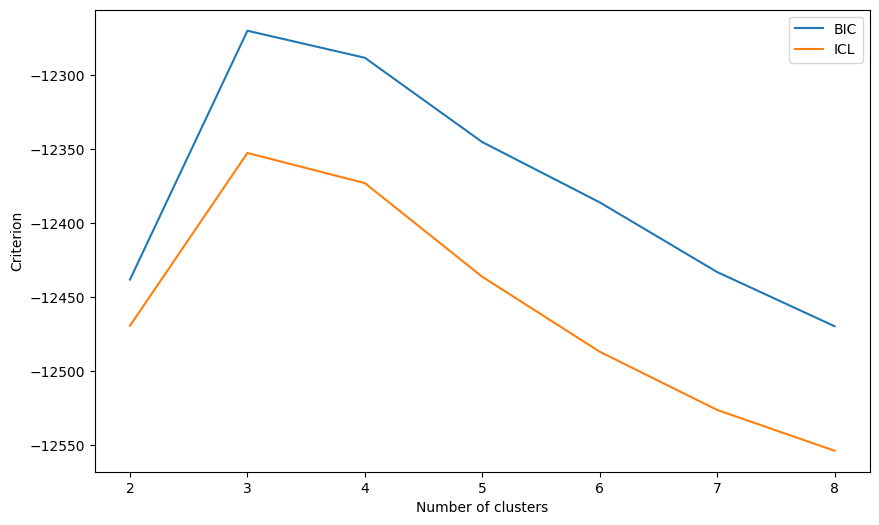

In [6]:
sns.lineplot(x=bic.keys(), y=bic.values(), label="BIC")
sns.lineplot(x=icl.keys(), y=icl.values(), label="ICL")
plt.xlabel("Number of clusters")
plt.ylabel("Criterion")
plt.show()

Choose the number of classes to study in the following.

In [7]:
k = 3

### Variables

Draw the discriminating level of each variable. A high value (close to one) means that the variable is highly discriminating. A low value (close to zero) means that the variable is poorly discriminating.

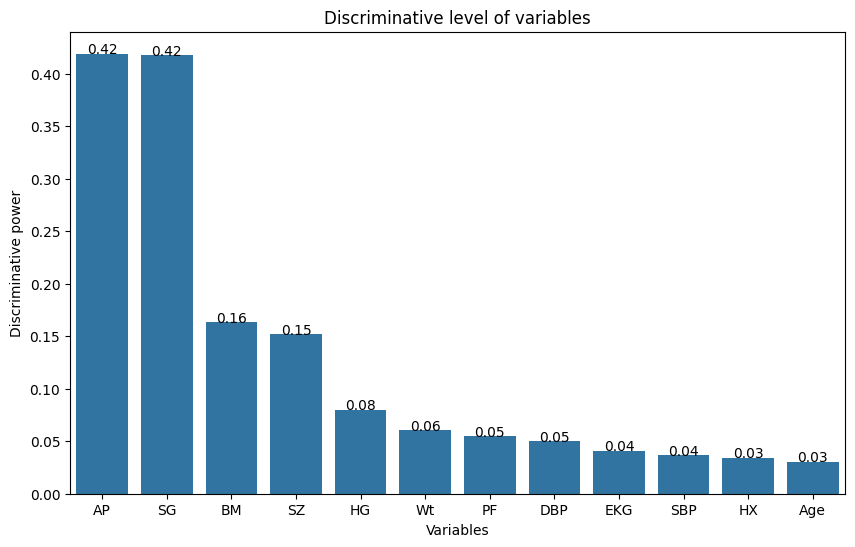

In [8]:
mod[k].plot_discriminative_power_variable()
plt.show()

Draw the similarity between every pair of variable. A high value (close to one) means that the two variables provide the same information for the clustering task (i.e. similar partitions). A low value (close to zero) means that the two variables provide some different information for the clustering task (i.e. different partitions).

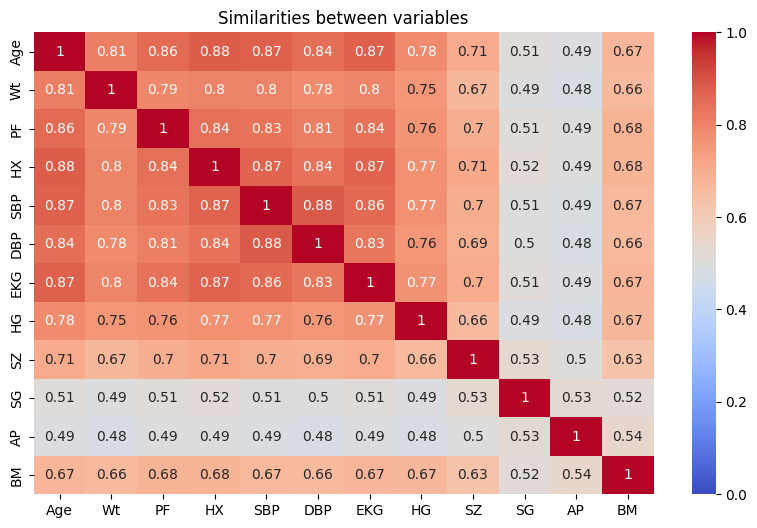

In [9]:
mod[k].plot_variable_similarity()
plt.show()

Select a variable to draw its distribution.

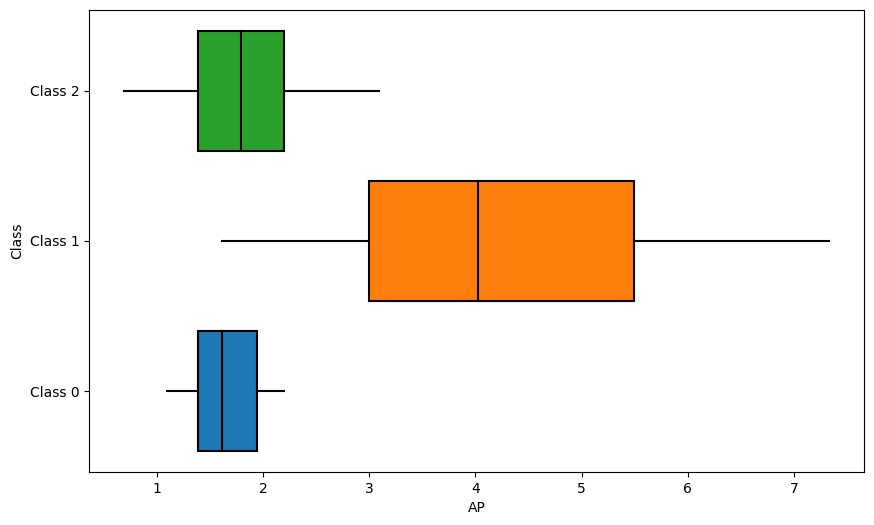

In [10]:
variable = "AP"
mod[k].plot_data(variable)
plt.show()

### Classes

Draw the proportion of individuals in each class.

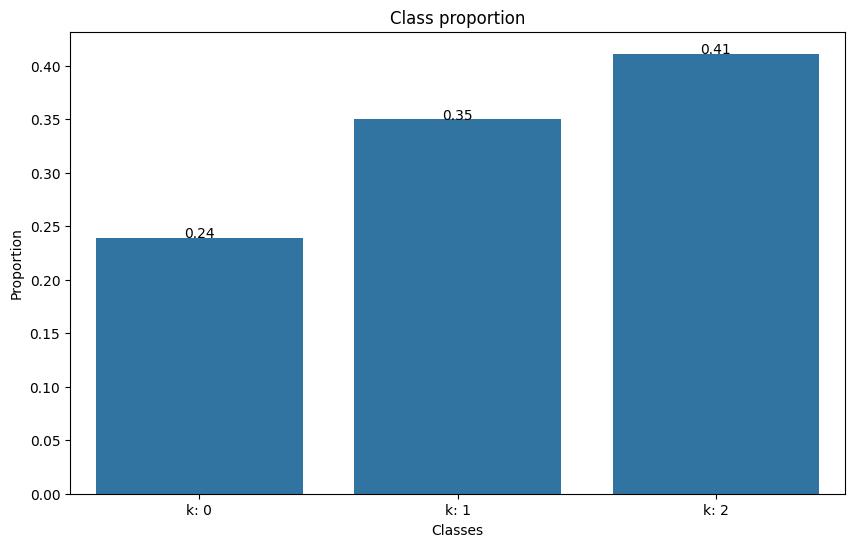

In [11]:
mod[k].plot_proportion()
plt.show()

Draw the similarity level between each pair of classes. A high value (close to one) means that the 2 classes are strongly different (i.e. low overlapping). A low value (close to zero) means that the 2 classes are similar for the clustering task (i.e. high overlapping).

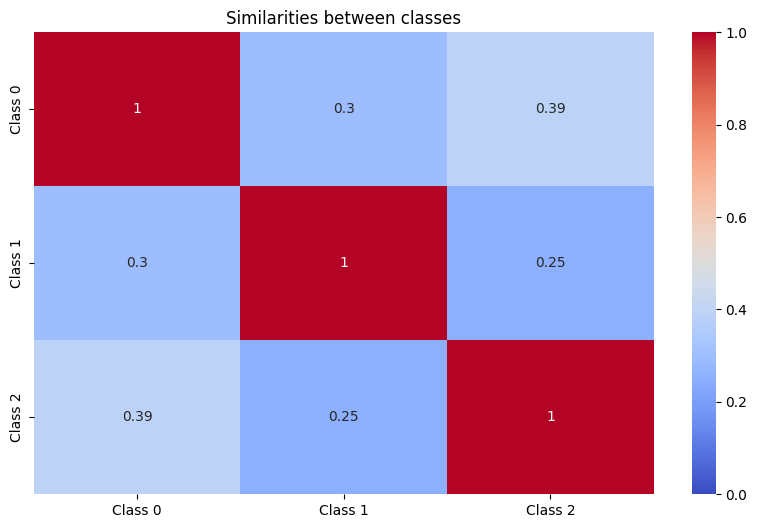

In [12]:
mod[k].plot_class_similarity()
plt.show()

Draw the discriminating level of each variable for the selected class.

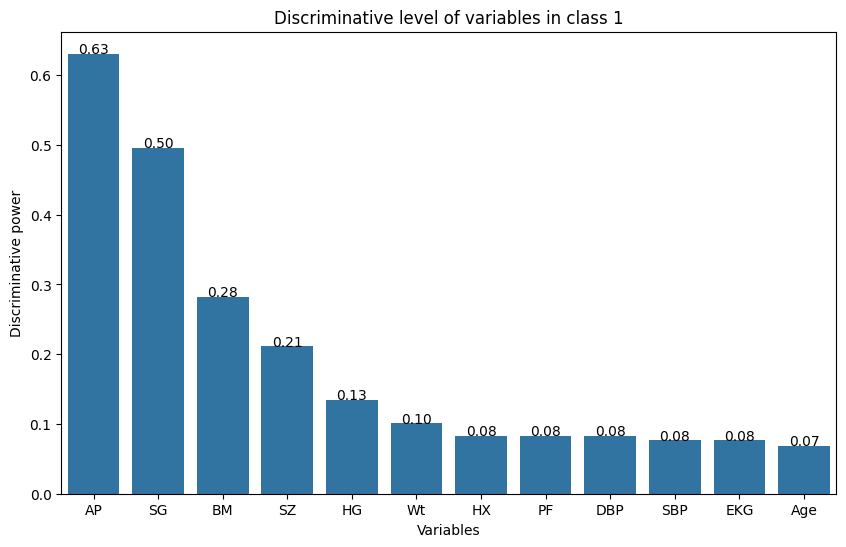

In [13]:
mod[k].plot_discriminative_power_variable(class_id=1)
plt.show()

Select a variable to draw its distribution for the selected class.

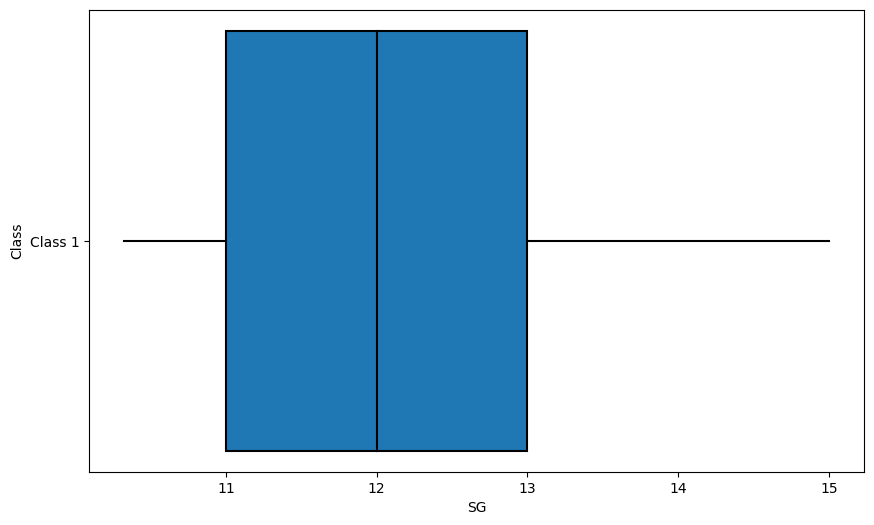

In [14]:
variable = "SG"
mod[k].plot_data(variable, class_ids=1)
plt.show()

# Prediction

We create a new patient by adding missing values to the first one

In [15]:
new_patient = prostate.iloc[0:1].copy()
new_patient.loc[0, "Age"] = "?"
new_patient.loc[0, "Wt"] = "[70:80]"
new_patient.loc[0, "EKG"] = "{4,5}"

In [16]:
new_patient

,Age,Wt,PF,HX,SBP,DBP,EKG,HG,SZ,SG,AP,BM
0,?,[70:80],1,1,15,9,"{4,5}",138,1.4142,8,1.0986,1


In [17]:
predicted_class = mod[k].predict(new_patient)
predicted_class

array([2], dtype=uint64)

You can access the imputed values for missing data and their statistics

In [18]:
mod[k].res_predict_["variable"]["data"]["z_class"]

{'completed': array([2], dtype=uint64),
 'stat':    k: 0  k: 1  k: 2
 0   0.4   0.0   0.6}

In [19]:
mod[k].res_predict_["variable"]["data"]["Age"]

{'stat':   index     median  q 2.500000%  q 97.500000%
     0.0  72.673043    61.646535     82.520748,
 'completed': array([72.67304349])}

In [20]:
mod[k].res_predict_["variable"]["data"]["Wt"]

{'stat':   index     median  q 2.500000%  q 97.500000%
     0.0  76.242178    71.285729     79.840864,
 'completed': array([76.242178])}

In [21]:
mod[k].res_predict_["variable"]["data"]["EKG"]

{'stat': {'0':   modality  probability
         5.0         0.76
         4.0         0.24},
 'completed': array([5], dtype=int32)}